# Prediction analysis

This notebook serves the purpose to plot the predictions in order to analyse them for further model improvements. At the same time variable importance can be analysed.

In [1]:
import os

from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

from estimators import get_estimator

In [2]:
os.chdir("..")

from training import training_cv, training_estimator, get_training_pipeline
from utils import load_train_data
from inference import plot_confusion_matrix

## Load data

In [3]:
X, y, le = load_train_data()

## Inspect currently best model on test data
XGB - 24.02.2023  13:54:00

In [4]:
# run training on 5-split CV
cv, cv_results = training_cv(model_class="XGB", n_jobs=1)

In [ ]:
# get cv indexes and stack all predictions from the testing sets
cv_idx = []
test_pred = np.empty(0)
true = np.empty(0)

for i, (train_index, test_index) in enumerate(cv.split(X)):
    cv_idx.append([train_index, test_index])
    test_pred = np.append(test_pred, cv_results["estimator"][i].predict(X.loc[test_index, :]))
    true = np.append(true, y[test_index])

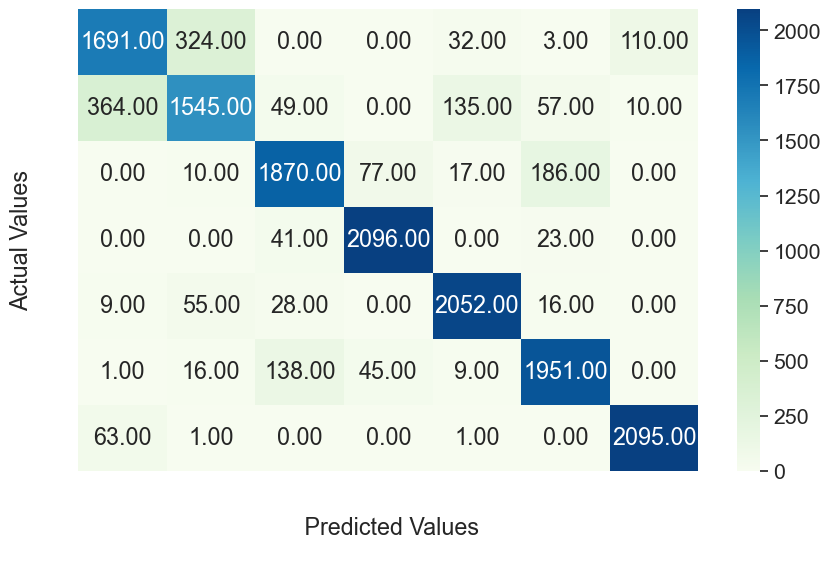

In [ ]:
# plot confusion matrix
plot_confusion_matrix(true, test_pred)

Let us look at permutation importance for the XGBoost...

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# define the input varibales
estimator, feat_eng, drop_list, grid, pca_components = get_estimator(model_class="XGB")

# get pipe and fit it on the train data
pipe = get_training_pipeline(estimator, feat_eng, drop_list, pca_components)
if grid is not None:
    pipe.set_params(**grid)

In [8]:
pipe.fit(
    X=X_train,
    y=y_train,
)

Pipeline(steps=[('euclidean_dist',
                 FunctionTransformer(func=<function euclidean_dist at 0x7f81fae3fc10>,
                                     kw_args={'drop_original': False})),
                ('linear_dist',
                 FunctionTransformer(func=<function linear_dist at 0x7f81fae3fca0>,
                                     kw_args={'drop_original': False})),
                ('mean_hillshade',
                 FunctionTransformer(func=<function mean_hillshade at 0x7f81fae3fd30>,
                                     kw_args={'drop_origi...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, ...))])

In [11]:
X_val_ = deepcopy(pipe[0:10]).transform(X_val)
r = permutation_importance(pipe[10], X_val_, y_val, n_repeats=30, random_state=0)
sorted_importances_idx = r.importances_mean.argsort()
importances = pd.DataFrame(
    r.importances[sorted_importances_idx].T,
    columns=X_val_.columns[sorted_importances_idx],
)
importances = importances.iloc[:,67:]

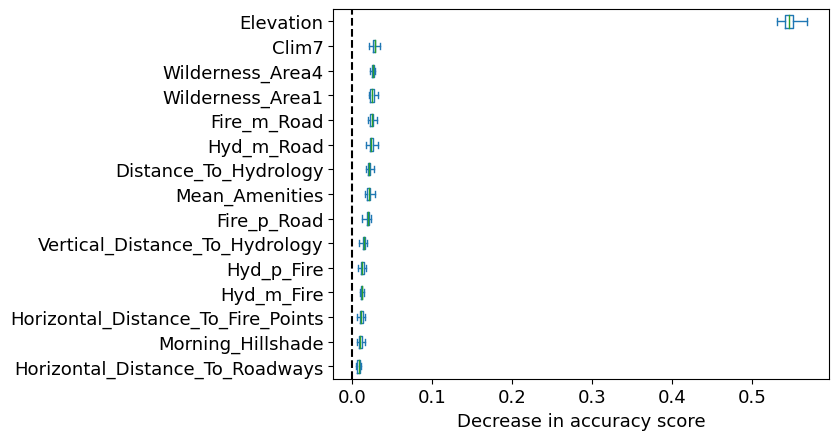

In [38]:
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score", size=13)
plt.yticks(size=13)
plt.xticks(size=13)
# plt.title("")
# plt.savefig("../../permutation_imp.pdf", bbox_inches="tight");

LogReg Baseline (all feature eng except aggregation method)

In [4]:
# run training on 5-split CV
cv, cv_results = training_cv(model_class="LogReg", n_jobs=1)

/Users/mariastoelben/opt/anaconda3/envs/PythonforDataScience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mariastoelben/opt/anaconda3/envs/PythonforDataScience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:

Fold 0: training accuracy 0.708, testing accuracy 0.705
Fold 1: training accuracy 0.708, testing accuracy 0.697
Fold 2: training accuracy 0.711, testing accuracy 0.689
Fold 3: training accuracy 0.712, testing accuracy 0.699
Fold 4: training accuracy 0.704, testing accuracy 0.714
----------- Mean train accuracy: 0.709 -----------
----------- Mean test accuracy:  0.701 -----------


/Users/mariastoelben/opt/anaconda3/envs/PythonforDataScience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# get cv indexes and stack all predictions from the testing sets
cv_idx = []
test_pred = np.empty(0)
true = np.empty(0)

for i, (train_index, test_index) in enumerate(cv.split(X)):
    cv_idx.append([train_index, test_index])
    test_pred = np.append(test_pred, cv_results["estimator"][i].predict(X.loc[test_index, :]))
    true = np.append(true, y[test_index])

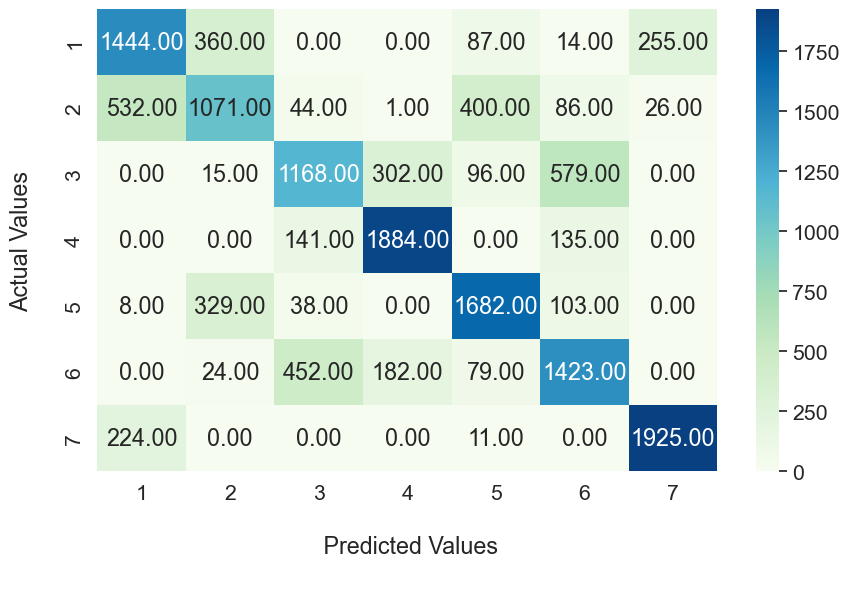

In [6]:
# plot confusion matrix
plot_confusion_matrix(true, test_pred)